1.读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。

In [24]:
import pandas as pd  
file_path = 'C:\\Users\\任雪宁\\Desktop\\open_rank_20236 (1).csv'  
df = pd.read_csv(file_path)  
if 'value' in df.columns:  
    max_value = df['value'].max()  
    min_value = df['value'].min()  
    mean_value = df['value'].mean()  
    median_value = df['value'].median()  
    print(f"最大值: {max_value}")  
    print(f"最小值: {min_value}")  
    print(f"均值: {mean_value}")  
    print(f"中位数: {median_value}")  
else:  
    print("数据集中不存在 'value' 列")

最大值: 1394.45
最小值: 200.68
均值: 346.9679
中位数: 273.66999999999996


2.读取data中2022文件夹下的activity_2020文件，分析美国排名前十的项目的平均增长率。

In [44]:
import pandas as pd  
import numpy as np  
file_path = 'C:\\Users\\任雪宁\\Desktop\\activity_2022.csv'  
df = pd.read_csv(file_path, index_col=0)  
df = df.apply(pd.to_numeric, errors='coerce')  
growth_rates = pd.DataFrame(index=df.index, columns=df.columns[1:])  
for i in range(1, len(df.columns)):  
    previous_month = df.columns[i-1]  
    current_month = df.columns[i]  
    df[previous_month] = df[previous_month].replace(0, np.nan)  
    growth_rates[current_month] = (df[current_month] - df[previous_month]) / df[previous_month] * 100  
average_growth_rates_per_project = growth_rates.mean(axis=1)  
print(average_growth_rates_per_project)

repo
MicrosoftDocs/azure-docs                  -1.792781
NixOS/nixpkgs                              0.029453
dotnet/runtime                            -2.284829
elastic/kibana                            -0.365071
firstcontributions/first-contributions    14.082374
flutter/flutter                           -1.240426
home-assistant/core                        0.845268
microsoft/vscode                           2.290469
pytorch/pytorch                            1.316038
rust-lang/rust                            -0.377805
dtype: float64


3.china_2022.csv表示中国开源领域排名前十的企业。global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。

In [118]:
import pandas as pd  
china_data = pd.read_csv('C:\\Users\\任雪宁\\Desktop\\china_2022.csv')  
global_data = pd.read_csv('C:\\Users\\任雪宁\\Desktop\\global_2022.csv')  
columns_to_compare = ['issue_comment','value', 'open_issue', 'open_pull', 'review_comment', 'merged_pull','rankDelta']  
comparison_results = pd.DataFrame(columns=['Metric', 'China_Mean', 'China_Median', 'China_Std', 'Global_Mean', 'Global_Median', 'Global_Std'])  
results_list = []  
for column in columns_to_compare:  
    china_mean = china_data[column].mean()  
    china_median = china_data[column].median()  
    china_std = china_data[column].std()  
    global_mean = global_data[column].mean()  
    global_median = global_data[column].median()  
    global_std = global_data[column].std()  
    results_list.append({  
        'Metric': column,  
        'China_Mean': china_mean,  
        'China_Median': china_median,  
        'China_Std': china_std,  
        'Global_Mean': global_mean,  
        'Global_Median': global_median,  
        'Global_Std': global_std  
    })   
results_df = pd.DataFrame(results_list)  
results_df = results_df.dropna(axis=1, how='all')  
comparison_results = pd.concat([comparison_results, results_df]).drop_duplicates().reset_index(drop=True)
print(comparison_results)  

           Metric  China_Mean  China_Median     China_Std  Global_Mean  \
0   issue_comment   61205.500     39141.000  49332.487917   341409.400   
1           value   40269.534     29789.235  30905.171810   215855.491   
2      open_issue    9169.200      6889.500   6810.653563    43300.200   
3       open_pull   16912.700     15953.000  10068.922805    83423.000   
4  review_comment   19857.500     10851.000  21115.073490   120392.100   
5     merged_pull   13764.100     13705.500   7692.752064    62472.000   
6       rankDelta       5.300         0.000      9.944848        0.100   

   Global_Median     Global_Std  
0      178629.00  422610.256775  
1      102790.85  235189.889662  
2       21648.00   54001.071938  
3       49103.50   87658.295125  
4       70433.50  128239.763444  
5       33288.00   73265.180035  
6           0.00       0.994429  


4.贝叶斯定理

贝叶斯定理参考：https://zh.wikipedia.org/wiki/%E8%B4%9D%E5%8F%B6%E6%96%AF%E5%AE%9A%E7%90%86

根据 OpenLeaderboard 上对前 10000 个活跃的项目统计，工具组件型项目占比 50 %，系统应用型占比 25 %，而内容资源型（非软件类）项目占比 25 %，成三分天下的态势。

非软件类项目中，带有 HTML/Markdown 标签的项目占 85 %，而软件类项目中带 HTML/Markdown标签的项目占比则为 10 %（注：HTML/Markdown 一般可用来书写文档内容）

工具组件型项目中，JavaScript 语言的项目占比 35 %，而非工具组件型项目中， JavaScript 语言的项目占比则为 10 %（注：JavaScript 是一种脚本编程语言，可以在网页上实现复杂的功能）

已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率是多少？

In [74]:
 P_A = 0.25  
P_B_given_A = 0.85  
P_B_given_not_A = 0.10  
P_B = P_B_given_A * P_A + P_B_given_not_A * (1 - P_A)  
P_A_given_B = (P_B_given_A * P_A) / P_B  
print(f"P(A|B) = {P_A_given_B}")

P(A|B) = 0.7391304347826088


5.接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？

In [86]:
P_C = 0.50  
P_D_given_C = 0.35  
P_D_given_not_C = 0.10  
P_D = P_D_given_C * P_C + P_D_given_not_C * (1 - P_C)  
P_C_given_D = (P_D_given_C * P_C) / P_D  
print(f"P(C|D) = {P_C_given_D}")

P(C|D) = 0.7777777777777778


6.根据以下数据建立可视化无向图

user = [1, 2, 3, 4]

edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

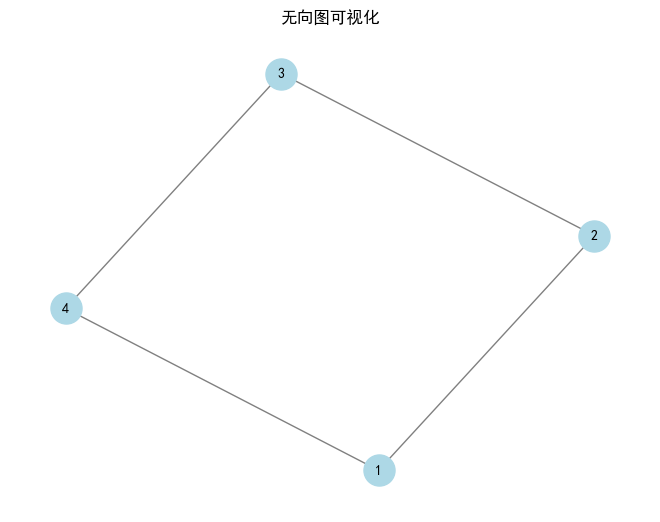

In [94]:
import matplotlib.pyplot as plt  
import matplotlib 
import networkx as nx  
matplotlib.rcParams['font.sans-serif'] = ['SimHei'] 
matplotlib.rcParams['axes.unicode_minus'] = False  
user = [1, 2, 3, 4]  
edges = [(1, 2), (2, 3), (3, 4), (4, 1)]  
G = nx.Graph()  
for user_id in user:  
    G.add_node(user_id)  
for edge in edges:  
    G.add_edge(edge[0], edge[1])  
pos = nx.spring_layout(G)  
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold', edge_color='gray')  
plt.title("无向图可视化")  
plt.show()

7.根据以下数据建立可视化有向图

users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

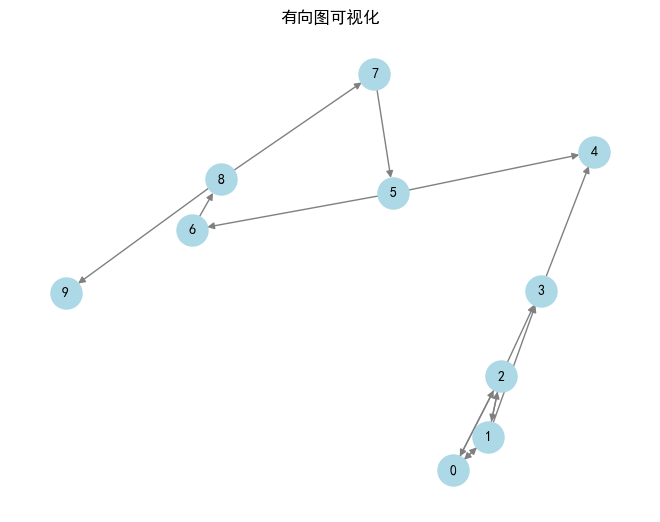

In [104]:
import matplotlib.pyplot as plt  
import networkx as nx  
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]  
G = nx.DiGraph()  
for user in users:  
    G.add_node(user) 
for edge in edges:  
    G.add_edge(edge[0], edge[1])  
pos = nx.spring_layout(G)  
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold', edge_color='gray', arrows=True)  
plt.title("有向图可视化")  
plt.show()

8.针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。 pageRank算法原理：https://zh.wikipedia.org/wiki/PageRank

{0: 0.09499069584253748, 1: 0.10547659652084884, 2: 0.10547659652084884, 3: 0.09499069584253748, 4: 0.15931683334639937, 5: 0.1020112395832942, 6: 0.0785753675867465, 7: 0.0785753675867465, 8: 0.1020112395832942, 9: 0.0785753675867465}


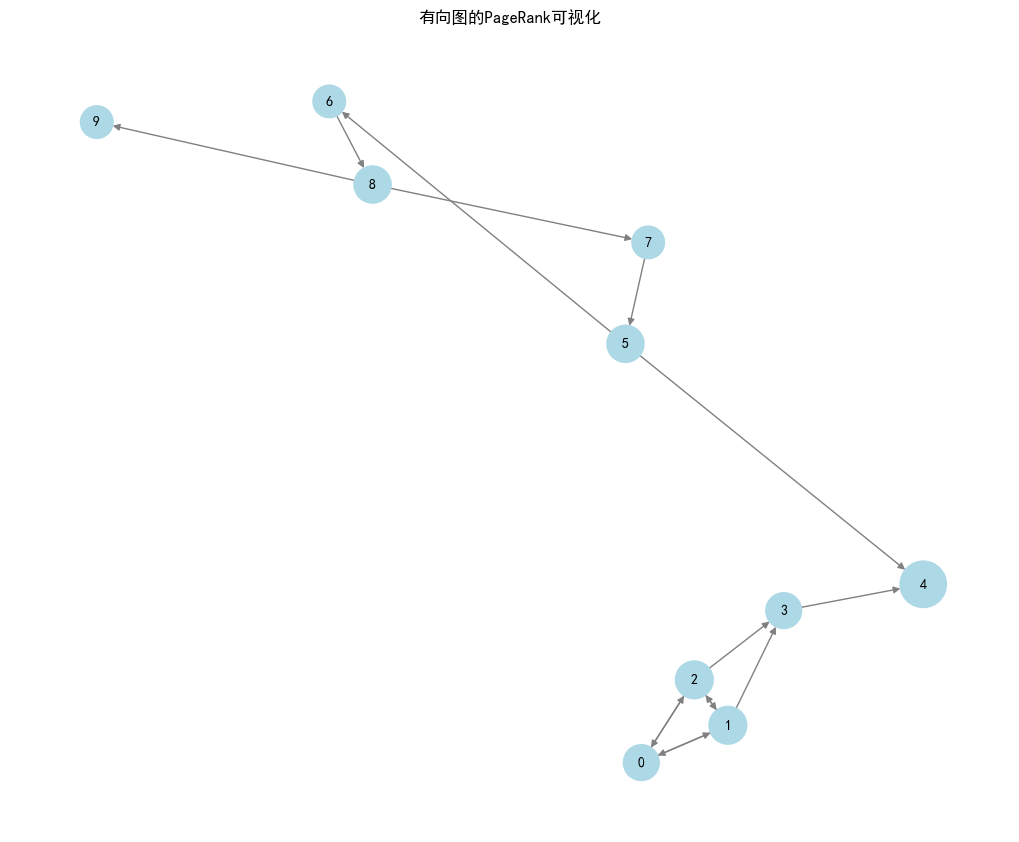

In [114]:
import networkx as nx  
import matplotlib.pyplot as plt  
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]  
G = nx.DiGraph()  
G.add_nodes_from(users)  
G.add_edges_from(edges)   
pagerank_values = nx.pagerank(G, alpha=0.85) 
pos = nx.spring_layout(G) 
plt.figure(figsize=(10, 8)) 
nx.draw(G, pos, with_labels=True, node_size=[v * 7000 for v in pagerank_values.values()],   
        node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray', arrows=True) 
print(pagerank_values)
plt.title("有向图的PageRank可视化")  
plt.show()